# **computer vision model capable of accurately classifying teeth into 7 distinct categories**

#Loading teeth_data

In [1]:
!pip install gdown
import gdown

In [2]:
file_id = "1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY"
url = f"https://drive.google.com/uc?id={file_id}"
output = "teeth_Dataset.zip"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=13058a4a-63df-4c3e-b3cf-264cde400700
To: /content/teeth_Dataset.zip
100%|██████████| 49.1M/49.1M [00:01<00:00, 45.8MB/s]


'teeth_Dataset.zip'

In [3]:
import zipfile
import os

zip_path = "/content/teeth_Dataset.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir("/content/"))

['.config', 'Teeth_Dataset', 'teeth_Dataset.zip', 'sample_data']


***deleting 3 folders dont need them***

In [4]:
!rm -r /content/Teeth_Dataset/Testing/outputs
!rm -r /content/Teeth_Dataset/Testing/output
!rm -r /content/Teeth_Dataset/Testing/out

#imports

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

#Data preproccesing (Normlization,Augmantation)

In [6]:
import random
img_size=(224,224)
batch_size=32
num_classes=7
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
train_dirc = "/content/Teeth_Dataset/Training"
val_dirc = "/content/Teeth_Dataset/Validation"
test_dirc = "/content/Teeth_Dataset/Testing"

In [7]:
# Define ImageDataGenerator with augmentations & normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
#normalization of test and validation data
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
import os
print(os.listdir("/content/Teeth_Dataset/Testing"))

['CaS', 'OLP', 'MC', 'CoS', 'output_image.jpg', 'Gum', 'OT', 'OC']


In [9]:
!rm -r /content/Teeth_Dataset/Testing/.ipynb_checkpoints

rm: cannot remove '/content/Teeth_Dataset/Testing/.ipynb_checkpoints': No such file or directory


In [10]:
print(os.listdir("/content/Teeth_Dataset/Testing"))

['CaS', 'OLP', 'MC', 'CoS', 'output_image.jpg', 'Gum', 'OT', 'OC']


In [11]:
# Create training,validation and testing generators
train_generator = train_datagen.flow_from_directory(
    train_dirc,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed)
val_generator = val_datagen.flow_from_directory(
    val_dirc,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed)
test_generator = test_datagen.flow_from_directory(
    test_dirc,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


#visualization

***visualize pic before and after augmantation***

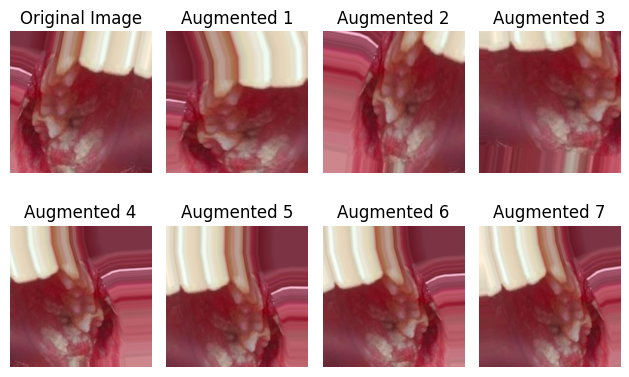

In [12]:
images, labels = next(train_generator)
original_image = images[0]

temp_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

original_image_expanded = np.expand_dims(original_image, axis=0)

plt.subplot(2, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

for i, batch in enumerate(temp_datagen.flow(original_image_expanded, batch_size=1)):
    if i == 7:
        break
    plt.subplot(2, 4, i + 2)
    augmented_image = batch[0]
    plt.imshow(augmented_image)
    plt.title(f'Augmented {i+1}')
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Model architecture

In [13]:
input_shape=[224,224,3]
Model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding='same',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Dense(units=256,activation="relu"),
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Dense(units=7,activation="softmax")
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
Model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,785,415 (98.36 MB)

 Trainable params: 25,785,415 (98.36 MB)

 Non-trainable params: 0 (0.00 B)

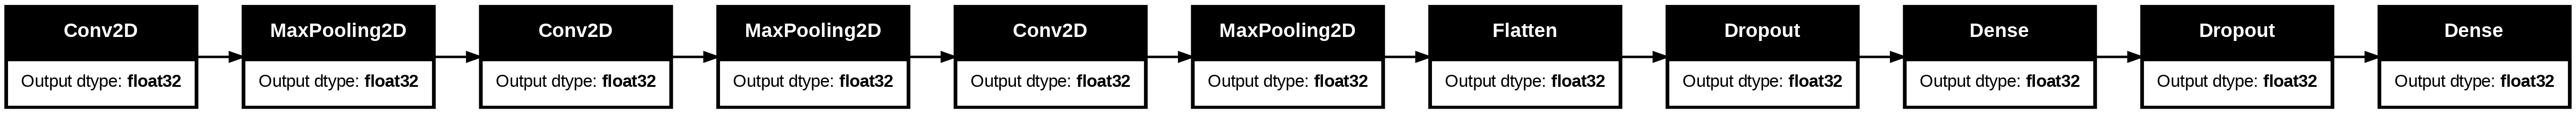

In [15]:
tf.keras.utils.plot_model(Model_1,rankdir="LR",show_dtype=True)

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
Model_1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Fitting

In [17]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [18]:
batch_size=32
history = Model_1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=early_stopping
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 450ms/step - accuracy: 0.1745 - loss: 1.9299 - val_accuracy: 0.3125 - val_loss: 1.7343
Epoch 2/100
 1/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3438 - loss: 1.8250

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3438 - loss: 1.8250 - val_accuracy: 0.3037 - val_loss: 1.7342
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 388ms/step - accuracy: 0.3022 - loss: 1.7773 - val_accuracy: 0.4072 - val_loss: 1.6515
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4688 - loss: 1.7077 - val_accuracy: 0.4043 - val_loss: 1.6566
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 408ms/step - accuracy: 0.3304 - loss: 1.6879 - val_accuracy: 0.4219 - val_loss: 1.5554
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5312 - loss: 1.4137 - val_accuracy: 0.4287 - val_loss: 1.5291
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 426ms/step - accuracy: 0.3748 - loss: 1.6062 - val_accuracy: 0.4082 - val_loss: 1.5320
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2812 - loss: 1.6183 - val_accuracy: 0.4268 - val_loss: 1.5009
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 441ms/step - accuracy: 0.3853 - loss: 1.5798 - val_accuracy: 0.4443

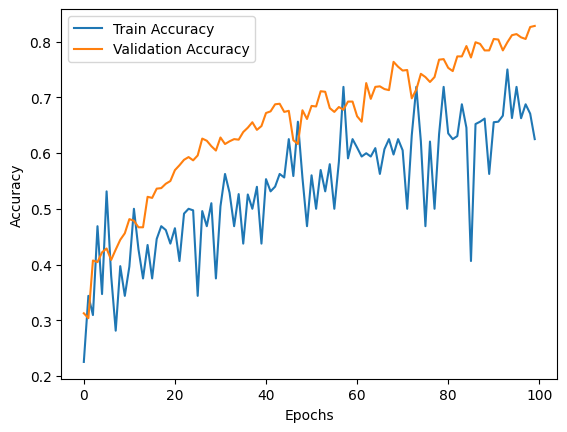

In [19]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
loss,acc=Model_1.evaluate(test_generator)
print("loss:",loss)
print("acc:",acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8296 - loss: 0.5635
loss: 0.5453300476074219
acc: 0.8336575627326965


In [21]:
Model_1.save("teeth_model.h5")